In [144]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)



In [145]:
df=pd.read_csv('/content/sample_data/cleaned_Salary_Data.csv')
df.head(10)



,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52,Male,Master's,Director,20.0,200000.0,USA,Asian
5,29,Male,Bachelor's,Marketing Analyst,2.0,55000.0,USA,Hispanic
6,42,Female,Master's,Product Manager,12.0,120000.0,USA,Asian
7,31,Male,Bachelor's,Sales Manager,4.0,80000.0,China,Korean
8,26,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,China,Chinese
9,38,Male,PhD,Senior Scientist,10.0,110000.0,Australia,Australian


# Exploratory Data Analysis (EDA)


In [146]:
df['Country'].unique()


array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

### Number of Entries from Each Country

In [147]:
country_wise = df['Country'].value_counts().reset_index()
country_wise.columns = ['Country', 'Number']
country_wise

,Country,Number
0,USA,1359
1,China,1343
2,Australia,1336
3,UK,1335
4,Canada,1325


In [148]:
fig = px.bar(country_wise,
             x='Country',
             y='Number',
             color='Country',
             log_y=True)  # log presentation
fig.show()


### Number of Different Races


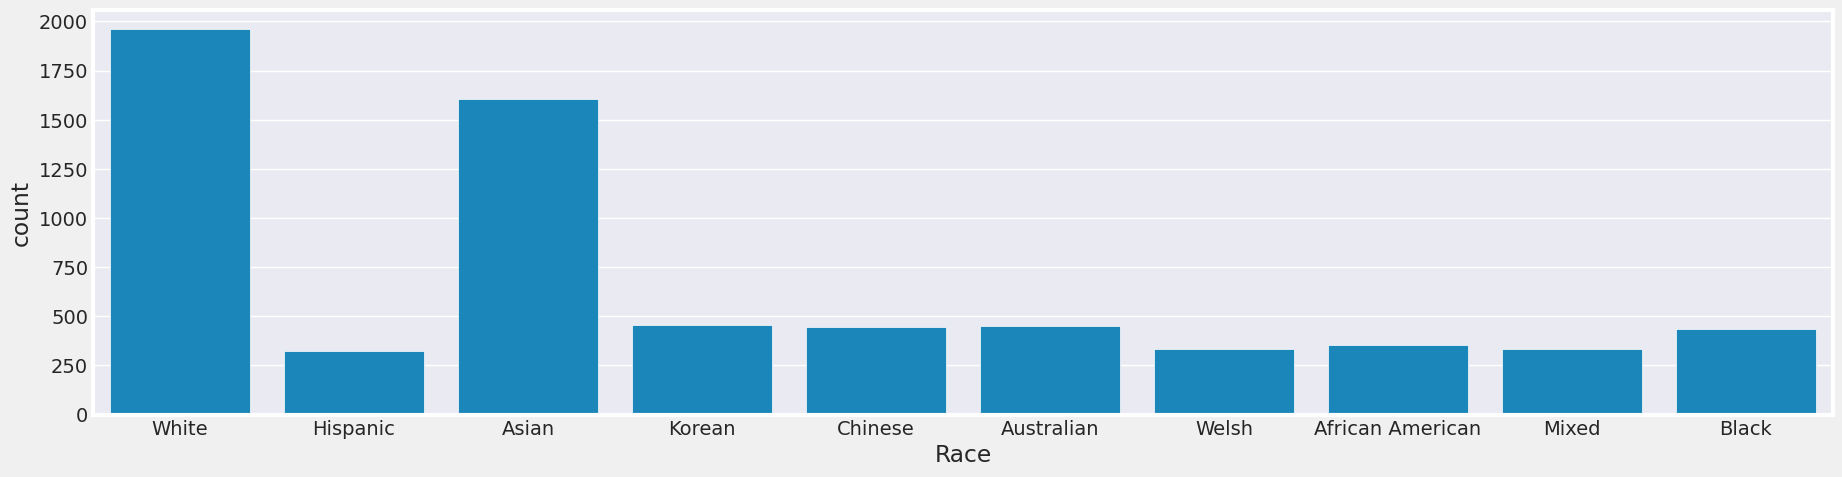

In [149]:
plt.figure(figsize=(20, 5))
sns.set_style("darkgrid")

ax = sns.countplot(x='Race', data=df)

plt.show()

### Most of the people are "White" and "Asian"



### Analyzing Education level and the Salary


In [150]:
df['Salary'] = df['Salary'].replace('[\$,]', '', regex=True).astype(float)


In [151]:
px.box(df, x="Education Level", y="Salary", title='Education Level V/S Salary',color='Education Level',template = 'plotly_dark')


Salary of Phd graduates is more than any other Educational Level while "High School" graduates are least

### Analyzing Gender & Salary


In [152]:
px.box(df, x="Gender", y="Salary", title='Gender V/S Salary',color='Gender',template = 'plotly_dark')


Median Salary of Males are 15k more than Females



In [153]:
px.box(df, x="Gender", y="Salary", title='Gender V/S Salary',color='Education Level',template = 'plotly_dark')


From the above plot we can see that:

Most of the "Other" gender people only have "High School" educational level. Males and Females with same Educational Level, Males have more salary by 15k.

In [154]:
 px.scatter(df[df['Gender'] == "Male"], x="Age", y="Salary", color="Country",
                 hover_name="Country", log_x=True)

In [155]:
px.scatter(df[df['Gender'] == "Female"], x="Age", y="Salary", color="Country",
                 hover_name="Country", log_x=True)


we can say that as Age increases Salary increases


## Analyzing YOE(Years of Experience) & Salary


In [156]:
px.scatter(df, x="Years of Experience", y="Salary", color='Years of Experience')


In [157]:
px.box(df, x="Country", y="Salary", title='Country V/S Salary',color='Country',template = 'plotly_dark')


Median salary in each Country is similar



In [158]:
px.box(df, x="Country", y="Salary", title='Country V/S Salary',color='Gender',template = 'plotly_dark')


In [159]:
px.box(df, x="Country", y="Salary", title='Country V/S Salary',color='Education Level',template = 'plotly_dark')


In [160]:
px.box(df, x="Country", y="Salary", title='Country V/S Salary',color='Race',template = 'plotly_dark')


UK and USA have most diverse race, as they have 4 races



## Top 10 Jobs with number of Employees


In [161]:
counts = df['Job Title'].value_counts().nlargest(10)
top_jobs = df[df['Job Title'].isin(counts.index)]
fig = px.histogram(top_jobs, x='Job Title', color='Job Title', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Count of top 10 Jobs', xaxis_title='Job Title', yaxis_title='Count')
fig.show()

Software Enginner and Data Scientist are the most sought professions.



In [162]:
salary = df.groupby('Job Title').sum()['Salary'].reset_index()
top10_jobs = salary.nlargest(10, 'Salary')
fig = px.bar(top10_jobs, x='Job Title', y='Salary', color='Job Title', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Total Salary of Top 10 Jobs', xaxis_title='Job Title', yaxis_title='Salary')
fig.show()

In [163]:
salary = df.groupby('Job Title')['Salary'].mean().reset_index()
top10_jobs = salary.nlargest(10, 'Salary')
fig = px.bar(top10_jobs, x='Job Title', y='Salary', color='Job Title', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Average Salary of Top 10 Jobs', xaxis_title='Job Title', yaxis_title='Average Salary')
fig.show()

## Data Scientist Jobs


In [164]:
data_scientist=df[df['Job Title']=='Data Scientist']
data_scientist.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
32,29,Male,Master's,Data Scientist,3.0,75000.0,USA,Hispanic
373,31,Male,Master's,Data Scientist,6.0,160000.0,Australia,White
377,30,Male,PhD,Data Scientist,5.0,180000.0,China,Korean
381,33,Male,PhD,Data Scientist,8.0,190000.0,UK,Mixed
385,27,Male,PhD,Data Scientist,2.0,115000.0,USA,African American
389,33,Male,PhD,Data Scientist,8.0,190000.0,Canada,Black
396,30,Female,PhD,Data Scientist,5.0,180000.0,China,Korean
400,33,Male,PhD,Data Scientist,8.0,190000.0,Canada,Asian
404,27,Male,PhD,Data Scientist,2.0,115000.0,UK,Asian
408,33,Male,PhD,Data Scientist,8.0,190000.0,UK,White


In [165]:
data_scientist.describe()


,Age,Years of Experience,Salary
count,453.000000,453.000000,453.000000
mean,36.064018,11.143488,166105.960265
std,7.144393,5.496112,28228.873136
min,27.000000,2.000000,75000.000000
25%,30.000000,7.000000,140000.000000
50%,33.000000,9.000000,168000.000000
75%,43.000000,16.000000,185000.000000
max,51.000000,24.000000,240000.000000


In [166]:
px.scatter(data_scientist,x='Years of Experience',y='Salary',color='Gender')


In [167]:
px.box(data_scientist,x='Education Level',y='Salary',color='Education Level',template = 'plotly_dark')


In [168]:
px.box(data_scientist,x='Education Level',y='Salary',color='Gender',template = 'plotly_dark')


In [169]:
px.box(data_scientist,x='Education Level',y='Salary',color='Race',template = 'plotly_dark')


In [170]:
px.box(data_scientist,x='Education Level',y='Salary',color='Country',template = 'plotly_dark')


## Software Enginner Jobs


In [171]:
Software=df[df['Job Title']=='Software Engineer']
Software.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
374,28,Female,Bachelor's,Software Engineer,3.0,125000.0,Canada,Black
378,29,Female,Bachelor's,Software Engineer,4.0,140000.0,Australia,White
382,31,Female,Bachelor's,Software Engineer,6.0,155000.0,UK,Welsh
386,29,Female,Bachelor's,Software Engineer,4.0,140000.0,USA,Hispanic


In [172]:
Software.describe()


,Age,Years of Experience,Salary
count,518.000000,518.000000,518.000000
mean,28.318533,4.449807,113243.243243
std,2.617617,2.219221,48031.287179
min,22.000000,1.000000,50000.000000
25%,27.000000,3.000000,70000.000000
50%,28.000000,4.000000,90000.000000
75%,30.000000,5.000000,160000.000000
max,42.000000,13.000000,197000.000000


In [173]:
px.scatter(Software,x='Years of Experience',y='Salary',color='Gender')


In [174]:
px.box(Software,x='Education Level',y='Salary',color='Education Level',template = 'plotly_dark')


## Full Stack Engineer Jobs


In [175]:
job=df[df['Job Title']=='Full Stack Engineer']
job.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
1203,27,Female,Master's,Full Stack Engineer,3.0,100000.0,UK,Mixed
1206,47,Female,PhD,Full Stack Engineer,12.0,175000.0,UK,Mixed
1216,32,Male,Bachelor's,Full Stack Engineer,5.0,115000.0,Australia,White
1220,42,Male,PhD,Full Stack Engineer,14.0,180000.0,China,White
1227,36,Female,Master's,Full Stack Engineer,8.0,140000.0,China,Korean


In [176]:
job.describe()


,Age,Years of Experience,Salary
count,308.000000,308.000000,308.000000
mean,34.038961,8.977273,126719.840909
std,6.652259,6.239216,29003.503002
min,23.000000,1.000000,55000.000000
25%,30.000000,5.000000,107584.250000
50%,33.000000,6.000000,120869.000000
75%,35.000000,10.000000,145000.000000
max,57.000000,33.000000,192756.000000


In [177]:
px.scatter(job,x='Years of Experience',y='Salary',color='Gender')


In [178]:
px.box(job,x='Education Level',y='Salary',color='Education Level',template = 'plotly_dark')


In [179]:
px.box(job,x='Education Level',y='Salary',color='Gender',template = 'plotly_dark')


In [180]:
px.box(job,x='Education Level',y='Salary',color='Country',template = 'plotly_dark')
